# 1:
#### 1.1
Simple Linear Regression uses just one factor to predict an outcome like guessing your grade based only on study time. Multiple Linear Regression uses several factors like study time sleep and attendance which usually makes predictions more accurate because it considers everything that could influence the result.

#### 1.2
In Simple Linear Regression, a continuous variable lets you predict something based on a full range, like seeing how age affects income, where changes happen gradually. An indicator variable, though, splits things into categories, like smoker versus non-smoker, so the prediction jumps between groups instead of flowing smoothly across a range.

#### 1.3
When you add an indicator variable to a continuous variable in Multiple Linear Regression, the model can adjust its predictions based on the category, allowing it to fit different trends for each group. This differs from Simple Linear Regression, which only looks at one smooth trend.

#### 1.4
Adding an interaction between a continuous and an indicator variable in Multiple Linear Regression allows the model to capture how the effect of the continuous variable changes depending on the category of the indicator. This means the relationship between the continuous variable and the outcome will be different for each group, rather than assuming the same effect for all categories.

#### 1.5
When a Multiple Linear Regression model uses indicator variables from a non-binary categorical variable, it creates binary variables (0 or 1) for each category, leaving one as a reference. This lets the model show how the outcome differs across categories, with each binary variable representing a group.

# 2:
#### 2.1
In this scenario, the outcome variable is the effectiveness of the advertising campaign (e.g., sales), and the predictors are the amounts spent on TV and online ads. Without considering interactions, the model assumes each ad type affects the outcome independently. This is represented as:  
Outcome = Beta_0 + Beta_1(TV spend) + Beta_2(Online spend) + ε.  

With an interaction, the model considers how TV ad spend depends on online ad spend and vice versa. This is represented as:  
Outcome = Beta_0 + Beta_1(TV spend) + Beta_2(Online spend) + Beta_3(TV spend × Online spend) + ε.  

The key difference is that the interaction model shows how combined ad spending affects the outcome differently than if the effects were simply added up.

#### 2.2
When the advertisement budgets are categorized as "high" or "low" (binary variables), the model updates to reflect these categorical predictors. Without interaction, the formula becomes:  
Outcome = Beta_0 + Beta_1(TV spend indicator) + Beta_2(Online spend indicator) + ε, where each indicator (0 or 1) represents whether the spend is low or high. With interaction, the model adds an interaction term:  
Outcome = Beta_0 + Beta_1(TV spend indicator) + Beta_2(Online spend indicator) + Beta_3(TV spend indicator * Online spend indicator) + ε, capturing how the effect of one ad type depends on the other. The key difference is that the interaction model accounts for the combined effect of both ad types, while the model without interaction assumes they affect the outcome independently.

# 3.
~~3.1, 3.2~~
#### 3.3
A - Logistic regression is a bit more complicated than linear regression because it involves something called log-odds, which is a way of modeling the likelihood of an event happening. Instead of predicting the outcome directly, it focuses on predicting the odds that something happens, and understanding that can be tricky.


B - To simplify, treat logistic regression like linear regression. Each coefficient shows how much a predictor affects the outcome, just like in linear regression. Though logistic regression works with odds, you can interpret it as predicting the outcome directly.

#### 3.4
A - You can easily do this by looking at the .fit().summary() table, just like in multiple linear regression. It gives you key details like the coefficients, p-values, and confidence intervals for each predictor. The p-values tell you whether the predictor is significant — a low p-value (usually under 0.05) means it's probably making a real impact. The coefficients show how much each predictor affects the outcome, whether positively or negatively. This helps you understand which variables matter most and how they influence the predictions.

#### 3.5

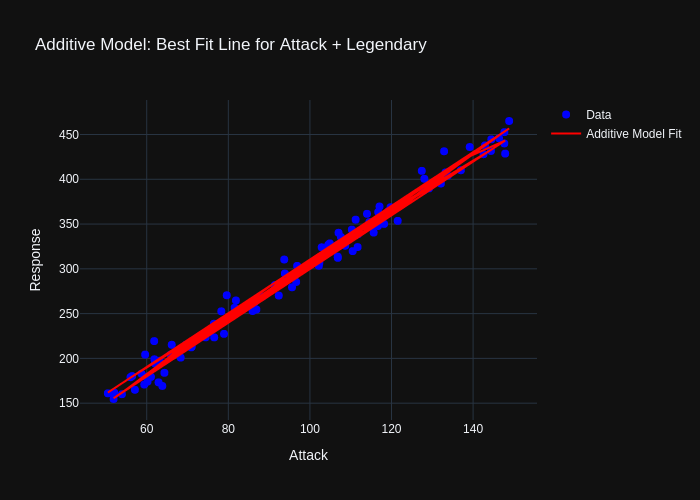

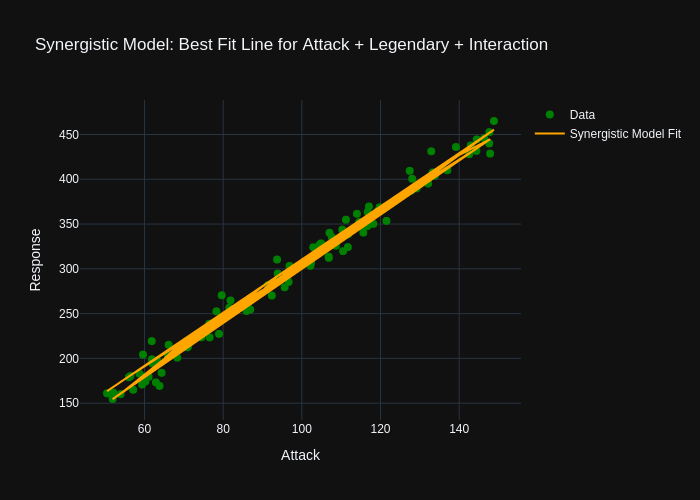

In [11]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Simulate some data
np.random.seed(0)

# Continuous variable (e.g., Attack)
attack_values = np.random.uniform(50, 150, 100)

# Binary variable (e.g., Legendary - 0 or 1)
legendary_values = np.random.choice([0, 1], size=100)

# Response variable (some random noise plus a linear relationship with attack and legendary)
response_values = 3 * attack_values + 10 * legendary_values + np.random.normal(0, 10, 100)

# Create DataFrame
df = pd.DataFrame({
    'Attack': attack_values,
    'Legendary': legendary_values,
    'Response': response_values
})

# Fit a linear regression model for the additive specification (no interaction)
model_additive = LinearRegression()
X_additive = df[['Attack', 'Legendary']]
y = df['Response']
model_additive.fit(X_additive, y)

# Get the coefficients
coeff_additive = model_additive.coef_

# Additive model prediction: y = a * Attack + b * Legendary + c (Intercept)
y_additive_pred = model_additive.predict(X_additive)

# Fit a linear regression model for the synergistic specification (interaction between Attack and Legendary)
df['Attack_Legendary'] = df['Attack'] * df['Legendary']
X_synergistic = df[['Attack', 'Legendary', 'Attack_Legendary']]
model_synergistic = LinearRegression()
model_synergistic.fit(X_synergistic, y)

# Get the coefficients for the synergistic model
coeff_synergistic = model_synergistic.coef_

# Synergistic model prediction: y = a * Attack + b * Legendary + c * (Attack * Legendary)
y_synergistic_pred = model_synergistic.predict(X_synergistic)

# Plot the data and best fit line for the additive model
fig_additive = go.Figure()

# Add scatter plot of data
fig_additive.add_trace(go.Scatter(
    x=df['Attack'], 
    y=df['Response'], 
    mode='markers', 
    name='Data', 
    marker=dict(color='blue', size=8)
))

# Add best fit line for the additive model
fig_additive.add_trace(go.Scatter(
    x=df['Attack'], 
    y=y_additive_pred, 
    mode='lines', 
    name='Additive Model Fit', 
    line=dict(color='red', width=2)
))

# Update layout for the additive model
fig_additive.update_layout(
    title="Additive Model: Best Fit Line for Attack + Legendary",
    xaxis_title="Attack",
    yaxis_title="Response",
    template="plotly_dark"
)

# Plot the data and best fit line for the synergistic model
fig_synergistic = go.Figure()

# Add scatter plot of data
fig_synergistic.add_trace(go.Scatter(
    x=df['Attack'], 
    y=df['Response'], 
    mode='markers', 
    name='Data', 
    marker=dict(color='green', size=8)
))

# Add best fit line for the synergistic model (with interaction term)
fig_synergistic.add_trace(go.Scatter(
    x=df['Attack'], 
    y=y_synergistic_pred, 
    mode='lines', 
    name='Synergistic Model Fit', 
    line=dict(color='orange', width=2)
))

# Update layout for the synergistic model
fig_synergistic.update_layout(
    title="Synergistic Model: Best Fit Line for Attack + Legendary + Interaction",
    xaxis_title="Attack",
    yaxis_title="Response",
    template="plotly_dark"
)

# Show both figures
fig_additive.show(renderer="png")
fig_synergistic.show(renderer="png")


### ChatGPT: https://chatgpt.com/share/6736c332-188c-8003-b155-0c27ce28b1b0

We discussed visualizing data using Plotly to generate "best fit lines" for both additive and synergistic linear models. The additive model treats continuous and binary predictors separately, while the synergistic model includes an interaction term between the predictors. We simulated data, fit linear regression models, and plotted the results, allowing for a comparison of how the interaction term influences the model fit.

# 4.

The contradiction arises because the R-squared value, which explains that the model only accounts for 17.6% of the variability in the data, measures how well the entire model fits the data. A low R-squared suggests there are other factors influencing the outcome that the model doesn't capture. However, the large coefficients with strong significance indicate that individual predictors have a strong effect on the dependent variable, meaning they are statistically important. This can happen when predictors are significant but don't explain much of the overall variability, possibly due to unmeasured factors or noise in the data

# 5. https://chatgpt.com/share/6736c5e3-52ac-8003-9ecd-7df7adb60428

1 - This code splits the dataset into training and testing sets while handling missing values.

2 - This code fits a linear regression model using "Attack" and "Defense" to predict "HP".

3 - This code calculates and compares the in-sample and out-of-sample R-squared values for the model's predictions.

4 - This code defines and fits a complex linear regression model with multiple interactions and categorical variables, while warning against adding too many interactions due to computational limitations.

5 - This code computes and prints the R-squared values for both in-sample and out-of-sample fit of the model on the test dataset.

##### Chatbot summary:
We discussed building and evaluating **OLS regression models** using `statsmodels` in Python, focusing on predictors like Attack, Defense, Speed, and Legendary status. The conversation covered creating models with interactions between variables and calculating **in-sample** and **out-of-sample R-squared** values to assess model performance. We also addressed challenges with handling complex interactions and large categorical variables to avoid computational issues.

# 6. https://chatgpt.com/share/6736c711-16b4-8003-9b5d-3a5f532b3ba5

The model4_linear_form creates new predictor variables by including interactions between multiple predictors. When these predictors are highly correlated, it causes multicollinearity, making the model too complex and sensitive to noise. This leads to overfitting, which is why the "out of sample" R-squared is low. Centering and scaling help reduce multicollinearity by standardizing the predictors, improving model stability (lowering the condition number). However, when you add many interaction terms, multicollinearity can still be severe, as seen in the extremely high condition number after scaling, indicating the model is unstable and generalizes poorly.

##### Chatbot summary:
In this discussion, we explored how centering and scaling predictor variables can affect the design matrix in a regression model. Even after centering and scaling, multicollinearity can persist, leading to high condition numbers. High multicollinearity, especially in interaction terms, can cause unstable coefficient estimates, which hinder the model’s ability to generalize well to new data, potentially resulting in poor out-of-sample performance.

# 7. https://chatgpt.com/share/6736c83b-0868-8003-a724-5fad0a3f3a44

Models 5, 6, and 7 build upon each other by progressively refining predictors. Model 5 adds more variables, including Speed, Legendary, and categorical factors like Generation and Type. Model 6 simplifies this by focusing on significant variables from Model 5, improving efficiency. Model 7 further enhances Model 6 by including interaction terms and applying centering and scaling to continuous variables, which stabilizes the model and reduces multicollinearity. Each step improves prediction accuracy and model stability.

##### Chatbot summary:
The discussion outlines the progression of model development: **model3_fit** establishes a basic model, while **model4_fit** refines it with more parameters. **Model5_linear_form** applies linear transformations for further refinement, and **model6_linear_form** optimizes the model for better performance. Finally, **model7_linear_form** enhances the model with advanced techniques, maintaining its linear structure.

# 8. https://chatgpt.com/share/6736c963-4c4c-8003-8172-2a5f3e4b94be

<function matplotlib.pyplot.show(close=None, block=None)>

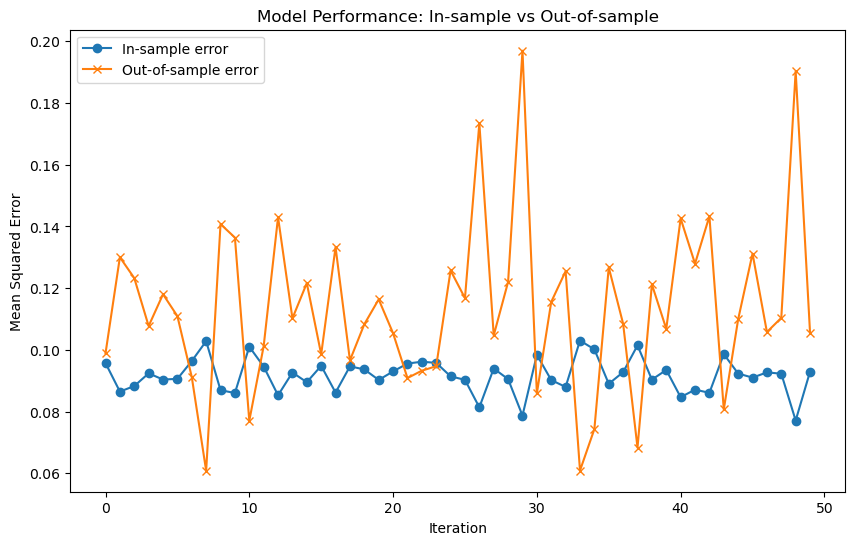

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Example data
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.rand(100)     # 100 target values

# Initialize lists to store performance metrics
in_sample_errors = []
out_of_sample_errors = []

# Define number of iterations
iterations = 50

for i in range(iterations):
    # Split data into training and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Initialize the model
    model = LinearRegression()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the training data (in-sample)
    y_train_pred = model.predict(X_train)
    in_sample_error = mean_squared_error(y_train, y_train_pred)
    
    # Predict on the test data (out-of-sample)
    y_test_pred = model.predict(X_test)
    out_of_sample_error = mean_squared_error(y_test, y_test_pred)
    
    # Collect the errors
    in_sample_errors.append(in_sample_error)
    out_of_sample_errors.append(out_of_sample_error)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), in_sample_errors, label='In-sample error', marker='o')
plt.plot(range(iterations), out_of_sample_errors, label='Out-of-sample error', marker='x')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance: In-sample vs Out-of-sample')
plt.legend()
plt.show


This experiment runs a linear regression model 50 times, each time with a new random split of the data into training and test sets. It compares how well the model does on the training data (in-sample) and the test data (out-of-sample), using mean squared error. If the model does much better on the training data than the test data, it might be overfitting, meaning it’s not good at generalizing to new data.

##### Chatbot summary:
We discussed creating a `for` loop to train a model multiple times, collect in-sample and out-of-sample performance metrics, and visualize the results, ensuring no fixed random seed is used during iterations.

# 9. https://chatgpt.com/share/6736cabb-5c18-8003-9be1-0130fd0de8d6

The code runs two linear regression models, model7 and model6, calculating R-squared values to measure how well the models fit the training data (in-sample) and how well they predict new data (out-of-sample). It first evaluates the models on data from Generation 1, then tests their performance on other generations. The process is repeated for different data subsets, comparing how well the models generalize to unseen data. The goal is to assess the models' predictive power using both in-sample and out-of-sample R-squared values.

##### Chatbot summary:
We discussed a Python code that performs linear regression analyses using two models (`model7` and `model6`), calculating and comparing "in-sample" and "out-of-sample" R-squared values for different data subsets based on `Generation` values.